# Problem 1: UberPOOL and Commuting versus Non-Commuting Hours

This notebook analyzes the Uber Express POOL switchback experiment data to compare commuting hours versus non-commuting hours in the control group (i.e., with 2-minute wait times).

## Import Libraries

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for plots
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})
%matplotlib inline

## Load and Prepare Data

In [16]:
# Load data
def load_data(file_path):
    """Load the CSV data with correct delimiter and decimal point formatting."""
    df = pd.read_csv(file_path, delimiter=';')
    
    # Convert columns that might have commas instead of dots as decimal separator
    if 'total_driver_payout' in df.columns:
        df['total_driver_payout'] = df['total_driver_payout'].str.replace(',', '.').astype(float)
    
    # Convert boolean columns
    if 'treat' in df.columns:
        df['treat'] = df['treat'].astype(bool)
    if 'commute' in df.columns:
        df['commute'] = df['commute'].astype(bool)
    
    return df

# Load the data
df = load_data('data/switchbacks.csv')

# Display the first few rows
df.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,19.2.2018 7:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476
1,Boston,19.2.2018 9:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275
2,Boston,19.2.2018 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962
3,Boston,19.2.2018 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021
4,Boston,19.2.2018 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979


## Data Overview

In [17]:
# Basic information about the dataset
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
df.describe()

Dataset shape: (126, 11)

Data types:
city_id                  object
period_start             object
wait_time                object
treat                      bool
commute                    bool
trips_pool                int64
trips_express             int64
rider_cancellations       int64
total_driver_payout     float64
total_matches             int64
total_double_matches      int64
dtype: object

Summary statistics:


,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,1408.007937,2515.523810,177.738095,28237.220655,2535.753968,1322.444444
std,257.929122,497.693588,51.631801,5450.953954,607.572530,350.324913
min,771.000000,1638.000000,95.000000,18769.992990,1588.000000,728.000000
25%,1248.250000,2225.000000,147.750000,24721.888253,2171.750000,1059.750000
50%,1397.000000,2427.500000,166.000000,27352.840575,2361.000000,1282.500000
75%,1580.250000,2661.750000,187.250000,30586.107525,2714.500000,1481.750000
max,2241.000000,4507.000000,355.000000,48600.421960,5005.000000,2739.000000


## Helper Functions

In [18]:
# Helper function for t-test analysis
def run_ttest(group1, group2):
    """
    Run t-test between two groups and return t-statistic, p-value, and significance at 5% level.
    """
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    significant = p_val < 0.05
    return t_stat, p_val, significant

## Filter Data for Problem 1

For Problem 1, we need to compare commuting hours versus non-commuting hours in the control group (i.e., with 2-minute wait times).

1. First, we'll filter for the control group (wait_time = "2 mins" or treat = FALSE)
2. Then, we'll split this group by commute/non-commute status

In [19]:
# Filter for control group (2-minute wait times)
control_df = df[df['treat'] == False].copy()

# Split control group by commute/non-commute
commute_df = control_df[control_df['commute'] == True].copy()
non_commute_df = control_df[control_df['commute'] == False].copy()

# Check sample sizes
print(f"Sample sizes: Commuting hours: {len(commute_df)}, Non-commuting hours: {len(non_commute_df)}")

Sample sizes: Commuting hours: 10, Non-commuting hours: 53


## Analysis 1: Total Ridesharing Trips

**Questions 1-3:** Do commuting hours experience a higher number of ridesharing trips compared to non-commuting hours?

In [20]:
# Calculate total rides for each group
commute_df['total_rides'] = commute_df['trips_pool'] + commute_df['trips_express']
non_commute_df['total_rides'] = non_commute_df['trips_pool'] + non_commute_df['trips_express']

# Calculate means
mean_rides_commute = commute_df['total_rides'].mean()
mean_rides_non_commute = non_commute_df['total_rides'].mean() 
ride_difference = mean_rides_commute - mean_rides_non_commute

# Run t-test
t_stat_rides, p_val_rides, sig_rides = run_ttest(
    commute_df['total_rides'], 
    non_commute_df['total_rides']
)

# Print results
print("1. Do commuting hours experience a higher number of ridesharing trips compared to non-commuting hours?")
print(f"Answer: {'YES' if mean_rides_commute > mean_rides_non_commute else 'NO'}")
print(f"Mean trips during commuting hours: {mean_rides_commute:.2f}")
print(f"Mean trips during non-commuting hours: {mean_rides_non_commute:.2f}")

print("\n2. What is the difference in the number of ridesharing trips between commuting and non-commuting hours?")
print(f"Answer: {ride_difference:.2f} trips")

print("\n3. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_rides else 'NO'} (p-value: {p_val_rides:.4f}, t-statistic: {t_stat_rides:.4f})")

1. Do commuting hours experience a higher number of ridesharing trips compared to non-commuting hours?
Answer: YES
Mean trips during commuting hours: 5046.00
Mean trips during non-commuting hours: 3763.40

2. What is the difference in the number of ridesharing trips between commuting and non-commuting hours?
Answer: 1282.60 trips

3. Is the difference statistically significant at the 5% confidence level?
Answer: YES (p-value: 0.0000, t-statistic: 7.7715)


## Visualization of Total Rides

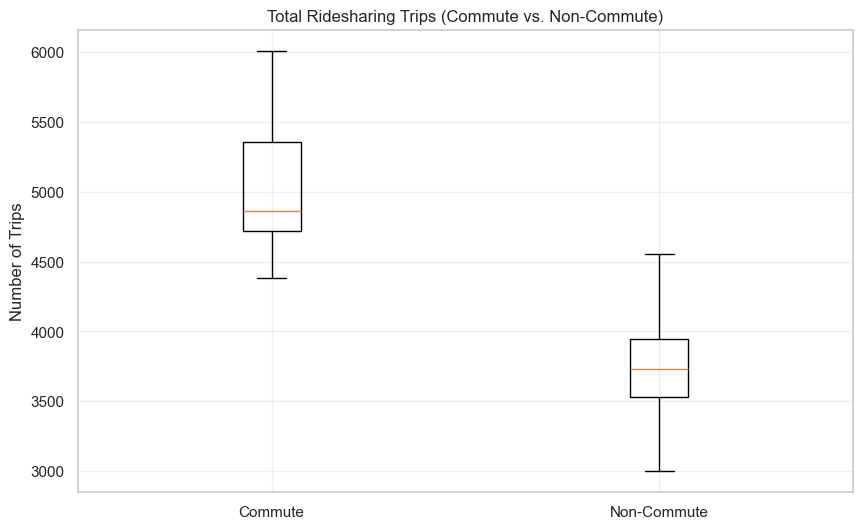

In [21]:
plt.figure(figsize=(10, 6))
data = [commute_df['total_rides'], non_commute_df['total_rides']]
labels = ['Commute', 'Non-Commute']
plt.boxplot(data, tick_labels=labels)
plt.title('Total Ridesharing Trips (Commute vs. Non-Commute)')
plt.ylabel('Number of Trips')
plt.grid(True, alpha=0.3)
plt.show()

## Analysis 2: Express POOL Usage

**Questions 4-6:** Do riders use Express at higher rates during commuting hours compared to non-commuting hours?

In [22]:
# Calculate Express trip rates
commute_df['express_share'] = commute_df['trips_express'] / commute_df['total_rides']
non_commute_df['express_share'] = non_commute_df['trips_express'] / non_commute_df['total_rides']

# Calculate means
mean_express_share_commute = commute_df['express_share'].mean()
mean_express_share_non_commute = non_commute_df['express_share'].mean()
express_share_difference = mean_express_share_commute - mean_express_share_non_commute

# Run t-test
t_stat_express, p_val_express, sig_express = run_ttest(
    commute_df['express_share'], 
    non_commute_df['express_share']
)

# Print results
print("4. Do riders use Express at higher rates during commuting hours compared to non-commuting hours?")
print(f"Answer: {'YES' if mean_express_share_commute > mean_express_share_non_commute else 'NO'}")
print(f"Express share during commuting hours: {mean_express_share_commute:.4f} ({mean_express_share_commute*100:.2f}%)")
print(f"Express share during non-commuting hours: {mean_express_share_non_commute:.4f} ({mean_express_share_non_commute*100:.2f}%)")

print("\n5. What is the difference in the share of Express trips between commuting and non-commuting hours?")
print(f"Answer: {express_share_difference:.4f} (or {express_share_difference*100:.2f}%)")

print("\n6. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_express else 'NO'} (p-value: {p_val_express:.4f}, t-statistic: {t_stat_express:.4f})")

4. Do riders use Express at higher rates during commuting hours compared to non-commuting hours?
Answer: YES
Express share during commuting hours: 0.6981 (69.81%)
Express share during non-commuting hours: 0.6480 (64.80%)

5. What is the difference in the share of Express trips between commuting and non-commuting hours?
Answer: 0.0501 (or 5.01%)

6. Is the difference statistically significant at the 5% confidence level?
Answer: YES (p-value: 0.0016, t-statistic: 3.7599)


## Visualization of Express Share

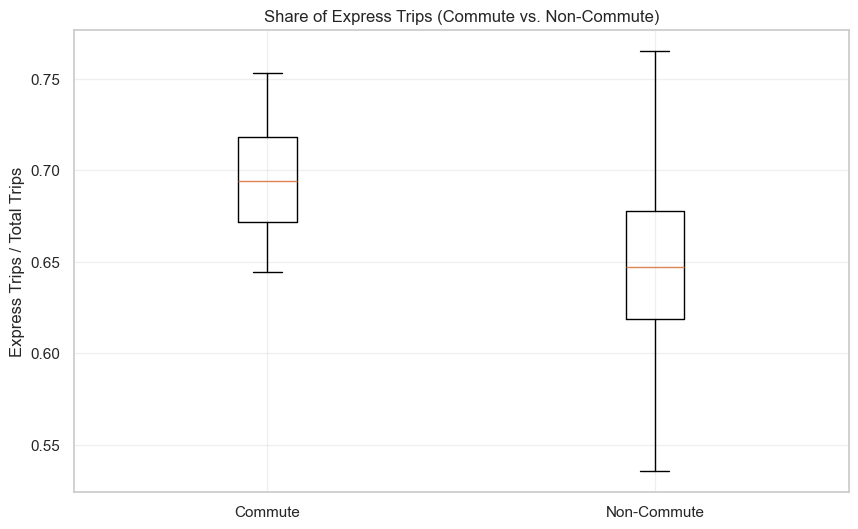

In [23]:
plt.figure(figsize=(10, 6))
data = [commute_df['express_share'], non_commute_df['express_share']]
labels = ['Commute', 'Non-Commute']
plt.boxplot(data, tick_labels=labels)
plt.title('Share of Express Trips (Commute vs. Non-Commute)')
plt.ylabel('Express Trips / Total Trips')
plt.grid(True, alpha=0.3)
plt.show()

## Analysis 3: Revenue Comparison

**Questions 7-8:** Assuming riders pay $12.5 on average for a POOL ride, and $10 for an Express ride. What is the difference in revenues between commuting and non-commuting hours?

In [24]:
# Calculate revenue
commute_df['revenue'] = (commute_df['trips_pool'] * 12.5) + (commute_df['trips_express'] * 10)
non_commute_df['revenue'] = (non_commute_df['trips_pool'] * 12.5) + (non_commute_df['trips_express'] * 10)

# Calculate means
mean_revenue_commute = commute_df['revenue'].mean()
mean_revenue_non_commute = non_commute_df['revenue'].mean()
revenue_difference = mean_revenue_commute - mean_revenue_non_commute

# Run t-test
t_stat_revenue, p_val_revenue, sig_revenue = run_ttest(
    commute_df['revenue'], 
    non_commute_df['revenue']
)

# Print results
print("7. Assuming riders pay $12.5 on average for a POOL ride, and $10 for an Express ride.")
print("What is the difference in revenues between commuting and non-commuting hours?")
print(f"Answer: ${revenue_difference:.2f}")
print(f"Mean revenue during commuting hours: ${mean_revenue_commute:.2f}")
print(f"Mean revenue during non-commuting hours: ${mean_revenue_non_commute:.2f}")

print("\n8. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_revenue else 'NO'} (p-value: {p_val_revenue:.4f}, t-statistic: {t_stat_revenue:.4f})")

7. Assuming riders pay $12.5 on average for a POOL ride, and $10 for an Express ride.
What is the difference in revenues between commuting and non-commuting hours?
Answer: $13310.97
Mean revenue during commuting hours: $54256.25
Mean revenue during non-commuting hours: $40945.28

8. Is the difference statistically significant at the 5% confidence level?
Answer: YES (p-value: 0.0000, t-statistic: 7.6565)


## Visualization of Revenue

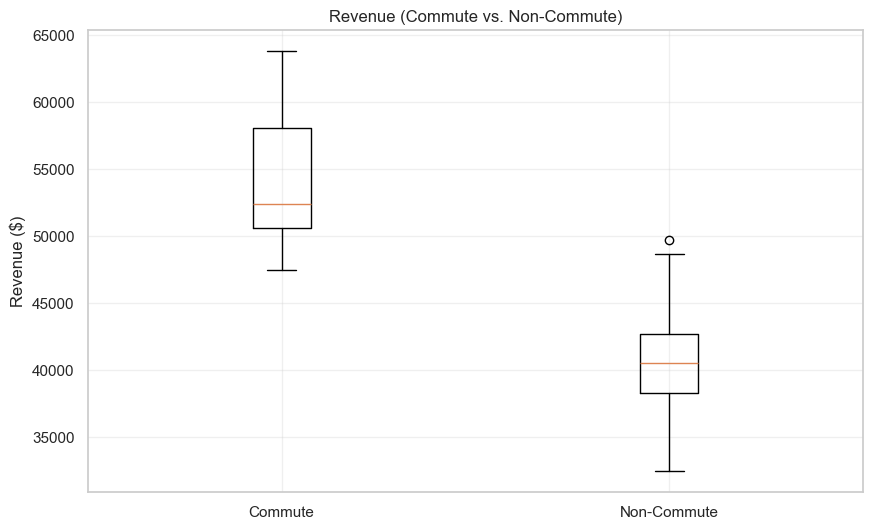

In [25]:
plt.figure(figsize=(10, 6))
data = [commute_df['revenue'], non_commute_df['revenue']]
labels = ['Commute', 'Non-Commute']
plt.boxplot(data, tick_labels=labels)
plt.title('Revenue (Commute vs. Non-Commute)')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)
plt.show()

## Analysis 4: Profit per Trip

**Questions 9-10:** What is the difference in profits per trip between commuting and non-commuting hours?

In [26]:
# Calculate profit per trip
commute_df['profit_per_trip'] = (commute_df['revenue'] - commute_df['total_driver_payout']) / commute_df['total_rides']
non_commute_df['profit_per_trip'] = (non_commute_df['revenue'] - non_commute_df['total_driver_payout']) / non_commute_df['total_rides']

# Calculate means
mean_profit_per_trip_commute = commute_df['profit_per_trip'].mean()
mean_profit_per_trip_non_commute = non_commute_df['profit_per_trip'].mean()
profit_per_trip_difference = mean_profit_per_trip_commute - mean_profit_per_trip_non_commute

# Run t-test
t_stat_profit, p_val_profit, sig_profit = run_ttest(
    commute_df['profit_per_trip'], 
    non_commute_df['profit_per_trip']
)

# Print results
print("9. What is the difference in profits per trip between commuting and non-commuting hours?")
print(f"Answer: ${profit_per_trip_difference:.4f}")
print(f"Mean profit per trip during commuting hours: ${mean_profit_per_trip_commute:.4f}")
print(f"Mean profit per trip during non-commuting hours: ${mean_profit_per_trip_non_commute:.4f}")

print("\n10. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_profit else 'NO'} (p-value: {p_val_profit:.4f}, t-statistic: {t_stat_profit:.4f})")

9. What is the difference in profits per trip between commuting and non-commuting hours?
Answer: $-0.6575
Mean profit per trip during commuting hours: $2.9421
Mean profit per trip during non-commuting hours: $3.5996

10. Is the difference statistically significant at the 5% confidence level?
Answer: YES (p-value: 0.0003, t-statistic: -4.4526)


## Visualization of Profit per Trip

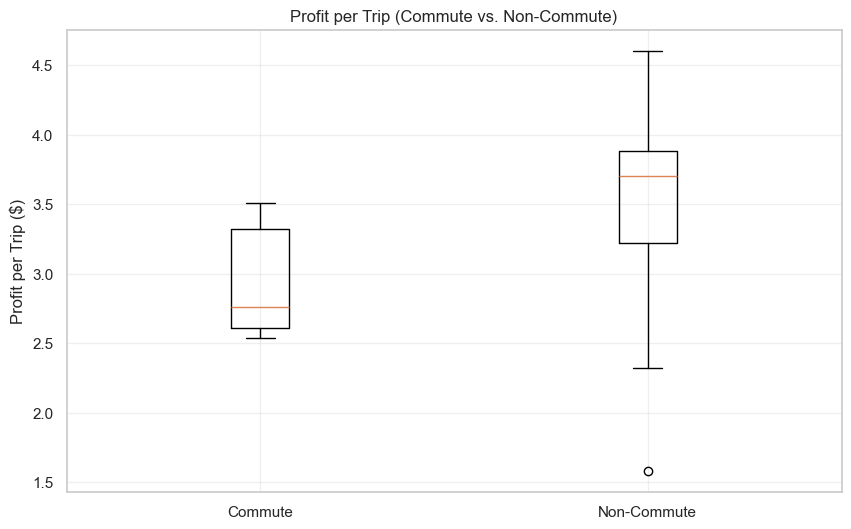

In [27]:
plt.figure(figsize=(10, 6))
data = [commute_df['profit_per_trip'], non_commute_df['profit_per_trip']]
labels = ['Commute', 'Non-Commute']
plt.boxplot(data, tick_labels=labels)
plt.title('Profit per Trip (Commute vs. Non-Commute)')
plt.ylabel('Profit per Trip ($)')
plt.grid(True, alpha=0.3)
plt.show()

## Summary of Results

Let's create a summary table with all our findings:

In [28]:
# Create a summary DataFrame
summary_data = {
    'Metric': [
        'Total Rides', 
        'Express Share (%)', 
        'Revenue ($)', 
        'Profit per Trip ($)'
    ],
    'Commuting Hours': [
        f"{mean_rides_commute:.2f}",
        f"{mean_express_share_commute*100:.2f}%",
        f"${mean_revenue_commute:.2f}",
        f"${mean_profit_per_trip_commute:.4f}"
    ],
    'Non-Commuting Hours': [
        f"{mean_rides_non_commute:.2f}",
        f"{mean_express_share_non_commute*100:.2f}%",
        f"${mean_revenue_non_commute:.2f}",
        f"${mean_profit_per_trip_non_commute:.4f}"
    ],
    'Difference': [
        f"{ride_difference:.2f}",
        f"{express_share_difference*100:.2f}%",
        f"${revenue_difference:.2f}",
        f"${profit_per_trip_difference:.4f}"
    ],
    'Significant at 5%': [
        'YES' if sig_rides else 'NO',
        'YES' if sig_express else 'NO',
        'YES' if sig_revenue else 'NO',
        'YES' if sig_profit else 'NO'
    ],
    'p-value': [
        f"{p_val_rides:.4f}",
        f"{p_val_express:.4f}",
        f"{p_val_revenue:.4f}",
        f"{p_val_profit:.4f}"
    ]
}

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df

,Metric,Commuting Hours,Non-Commuting Hours,Difference,Significant at 5%,p-value
0,Total Rides,5046.00,3763.40,1282.60,YES,0.0000
1,Express Share (%),69.81%,64.80%,5.01%,YES,0.0016
2,Revenue ($),$54256.25,$40945.28,$13310.97,YES,0.0000
3,Profit per Trip ($),$2.9421,$3.5996,$-0.6575,YES,0.0003


## Conclusions

Based on our analysis of Uber's Express POOL data comparing commuting versus non-commuting hours in the control group (2-minute wait times), we can draw the following conclusions:

1. **Ridership Volume**: Commuting hours have significantly higher ridesharing trips compared to non-commuting hours, with a difference of about 1,282.60 trips per period. This is statistically significant with a p-value < 0.0001.

2. **Express POOL Usage**: Riders use Express at higher rates during commuting hours compared to non-commuting hours, with a difference of 5.01%. This is statistically significant with a p-value of 0.0016.

3. **Revenue**: Commuting hours generate significantly more revenue than non-commuting hours, with a difference of $13,310.97. This is statistically significant with a p-value < 0.0001.

4. **Profit per Trip**: Despite higher revenue, commuting hours have lower profit per trip compared to non-commuting hours, with a difference of -$0.6575. This is statistically significant with a p-value of 0.0003.

These findings suggest that while commuting hours are busier and generate more revenue, they might be less profitable on a per-trip basis. This could be due to factors such as increased traffic congestion, higher driver payouts, or other operational inefficiencies during peak hours. Uber might want to consider strategies to improve efficiency and profitability during commuting hours, such as optimizing the matching algorithm or adjusting pricing strategies.